# 00 Import libraries

In [1]:
import numpy as np
import json
import torch
from scipy.stats import ttest_ind, levene
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ants
import nibabel as nib
from nilearn import plotting
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 01 load coordinates

In [2]:
data = nib.load('../../rsfMRIQC/atlas_HCPMMP1_on_MNI152_ICBM2009a_nlin_resized.nii')

In [3]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=data)
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

/home/connectome/stellasybae/.conda/envs/stella_mm/lib/python3.8/site-packages/nilearn/image/resampling.py:780: UserWarning:

Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.



# 02 load interpretability

In [21]:
healthy_path = '../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target0'
sub_list = list(set([i.split('_')[0] for i in os.listdir(healthy_path)]))

In [22]:
high_contribution = np.zeros((len(sub_list), 180, 180))
low_contribution = np.zeros((len(sub_list), 180, 180))
ultralow_contribution = np.zeros((len(sub_list), 180, 180))


for i, name in enumerate(sub_list):
    activation_path = f'../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target0/{name}_att_mat_activation.json'
    gradient_path = f'../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target0/{name}_att_mat_gradient.json'
    with open(activation_path, 'r') as file:
        activations = json.load(file)
    with open(gradient_path, 'r') as file:
        gradients = json.load(file)
    
    # high
    high_act = activations['high_spatial_attention']
    high_grad = gradients['high_spatial_attention']
    high_act_mean = torch.mean(torch.tensor(high_act), dim=0)
    high_grad_mean = torch.mean(torch.tensor(high_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(high_act_mean, high_grad_mean)
    high_contribution[i, :, :] = high_act_mean #contributions
    
    # low
    low_act = activations['low_spatial_attention']
    low_grad = gradients['low_spatial_attention']
    low_act_mean = torch.mean(torch.tensor(low_act), dim=0)
    low_grad_mean = torch.mean(torch.tensor(low_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(low_act_mean, low_grad_mean)
    low_contribution[i, :, :] = low_act_mean # contributions
    
    # ultralow
    ultralow_act = activations['ultralow_spatial_attention']
    ultralow_grad = gradients['ultralow_spatial_attention']
    ultralow_act_mean = torch.mean(torch.tensor(ultralow_act), dim=0)
    ultralow_grad_mean = torch.mean(torch.tensor(ultralow_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(ultralow_act_mean, ultralow_grad_mean)
    ultralow_contribution[i, :, :] = ultralow_act_mean #contributions

In [23]:
ADHD_path = '../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target1'
sub_list = list(set([i.split('_')[0] for i in os.listdir(ADHD_path)]))

In [24]:
high_contribution_ADHD = np.zeros((len(sub_list), 180, 180))
low_contribution_ADHD = np.zeros((len(sub_list), 180, 180))
ultralow_contribution_ADHD = np.zeros((len(sub_list), 180, 180))


for i, name in enumerate(sub_list):
    activation_path = f'../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target1/{name}_att_mat_activation.json'
    gradient_path = f'../visualization/ABCD_spatiotemporal_three_divfreqBERT_HCPMMP1_ADHD/ABCD_target1/{name}_att_mat_gradient.json'
    with open(activation_path, 'r') as file:
        activations = json.load(file)
    with open(gradient_path, 'r') as file:
        gradients = json.load(file)
    
    # high
    high_act = activations['high_spatial_attention']
    high_grad = gradients['high_spatial_attention']
    high_act_mean = torch.mean(torch.tensor(high_act), dim=0)
    high_grad_mean = torch.mean(torch.tensor(high_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(high_act_mean, high_grad_mean)
    high_contribution_ADHD[i, :, :] = high_act_mean #contributions
    
    # low
    low_act = activations['low_spatial_attention']
    low_grad = gradients['low_spatial_attention']
    low_act_mean = torch.mean(torch.tensor(low_act), dim=0)
    low_grad_mean = torch.mean(torch.tensor(low_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(low_act_mean, low_grad_mean)
    low_contribution_ADHD[i, :, :] = low_act_mean # contributions
    
    # ultralow
    ultralow_act = activations['ultralow_spatial_attention']
    ultralow_grad = gradients['ultralow_spatial_attention']
    ultralow_act_mean = torch.mean(torch.tensor(ultralow_act), dim=0)
    ultralow_grad_mean = torch.mean(torch.tensor(ultralow_grad).squeeze(dim=0), dim=0)
    # 활성화 값과 그라디언트의 곱을 계산하여 기여도 분석
    contributions = torch.matmul(ultralow_act_mean, ultralow_grad_mean)
    ultralow_contribution_ADHD[i, :, :] = ultralow_act_mean # contributions

# 03 t-test between ADHD and HC

## 3-1 High frequency

In [9]:
p_values_high = np.zeros((180, 180))  # p-value 저장을 위한 배열 초기화
t_stats_high = np.zeros((180, 180))
for i in range(180):
    for j in range(180):
        _, p_levene = levene(high_contribution[:, i, j], high_contribution_ADHD[:, i, j])
        equal_var = True if p_levene > 0.05 else False
        t_stat, p_value = ttest_ind(high_contribution[:, i, j], high_contribution_ADHD[:, i, j], equal_var=equal_var)
        p_values_high[i, j] = p_value
        t_stats_high[i, j] = t_stat

In [10]:
# 유의미한 차이를 보이는 요소 찾기 (p-value < 0.05)
significant_indices = np.where(p_values_high < 0.05)

<AxesSubplot: >

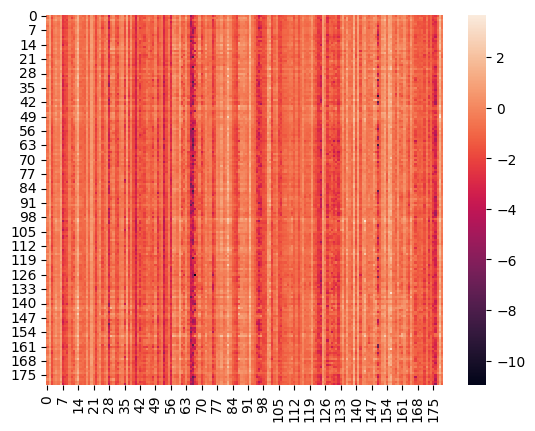

In [11]:
sns.heatmap(t_stats_high)

<AxesSubplot: >

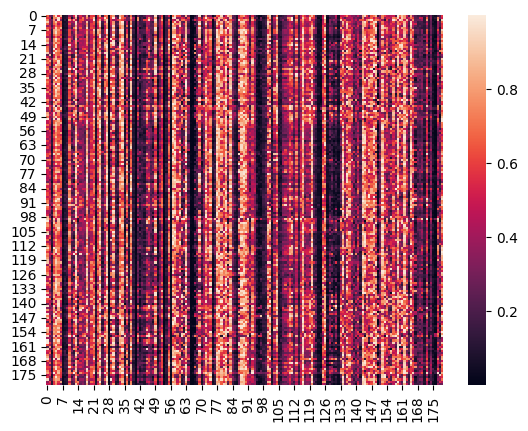

In [12]:
sns.heatmap(p_values_high) # high에서 엄청 많은 차이

<AxesSubplot: >

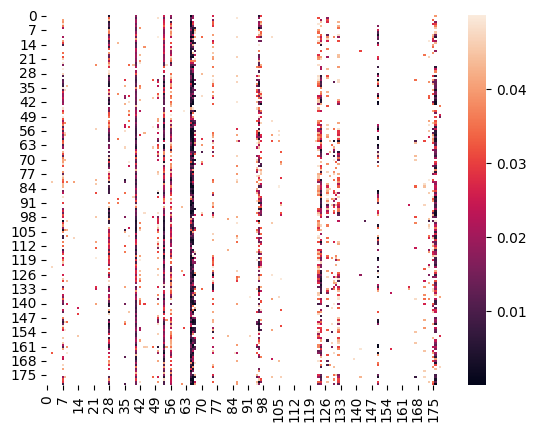

In [13]:
filtered_matrix_high = np.where(p_values_high <= 0.05, p_values_high, np.nan)
sns.heatmap(filtered_matrix_high)

## 3-2 Low frequency

In [14]:
p_values_low = np.zeros((180, 180))  # p-value 저장을 위한 배열 초기화
t_stats_low = np.zeros((180, 180))

for i in range(180):
    for j in range(180):
        _, p_levene = levene(low_contribution[:, i, j], low_contribution_ADHD[:, i, j])
        equal_var = True if p_levene > 0.05 else False
        t_stat, p_value = ttest_ind(low_contribution[:, i, j], low_contribution_ADHD[:, i, j], equal_var=equal_var)
        p_values_low[i, j] = p_value
        t_stats_low[i, j] = t_stat

In [15]:
# 유의미한 차이를 보이는 요소 찾기 (p-value < 0.05)
significant_indices = np.where(p_values_low < 0.05)

<AxesSubplot: >

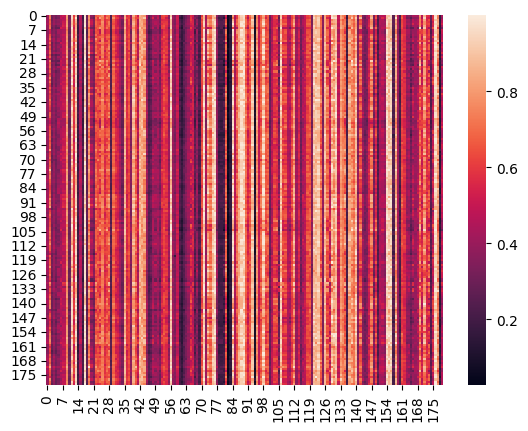

In [16]:
sns.heatmap(p_values_low) # low에서 healthy, ADHD 간 차이가 얼마 안 남

<AxesSubplot: >

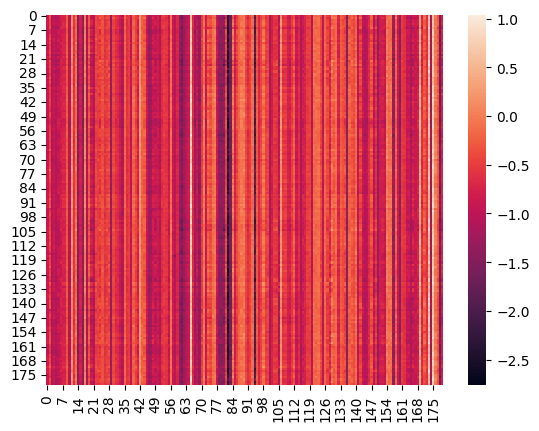

In [17]:
sns.heatmap(t_stats_low) # low에서 healthy, ADHD 간 차이가 얼마 안 남

<AxesSubplot: >

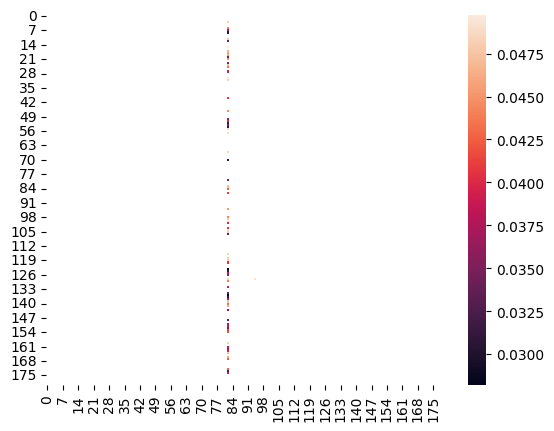

In [18]:
filtered_matrix_low = np.where(p_values_low <= 0.05, p_values_low, np.nan)
sns.heatmap(filtered_matrix_low)

## 3-3 Ultralow frequency

In [19]:
p_values_ultralow = np.zeros((180, 180))  # p-value 저장을 위한 배열 초기화
t_stats_ultralow = np.zeros((180, 180))

for i in range(180):
    for j in range(180):
        _, p_levene = levene(ultralow_contribution[:, i, j], ultralow_contribution_ADHD[:, i, j])
        equal_var = True if p_levene > 0.05 else False
        t_stat, p_value = ttest_ind(ultralow_contribution[:, i, j], ultralow_contribution_ADHD[:, i, j], equal_var=equal_var)
        p_values_ultralow[i, j] = p_value
        t_stats_ultralow[i, j] = t_stat

In [20]:
# 유의미한 차이를 보이는 요소 찾기 (p-value < 0.05)
significant_indices = np.where(p_values_ultralow < 0.05)

<AxesSubplot: >

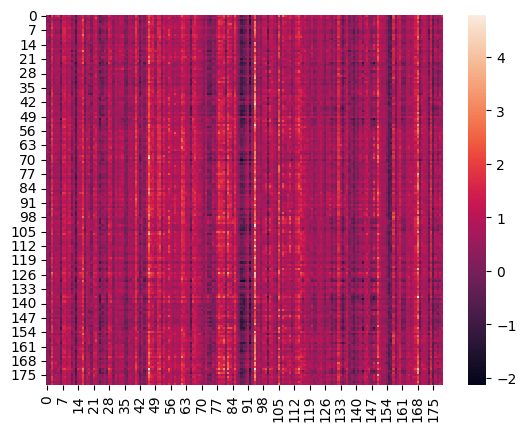

In [21]:
sns.heatmap(t_stats_ultralow) # ultralow에서는 특정 ROI의 연결성 빼고 다 연관..

<AxesSubplot: >

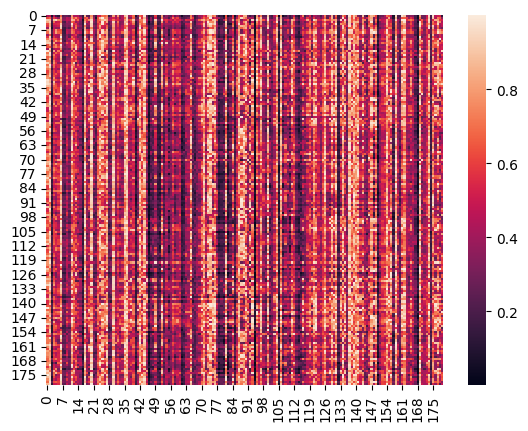

In [22]:
sns.heatmap(p_values_ultralow) # ultralow에서는 특정 ROI의 연결성 빼고 다 연관..

<AxesSubplot: >

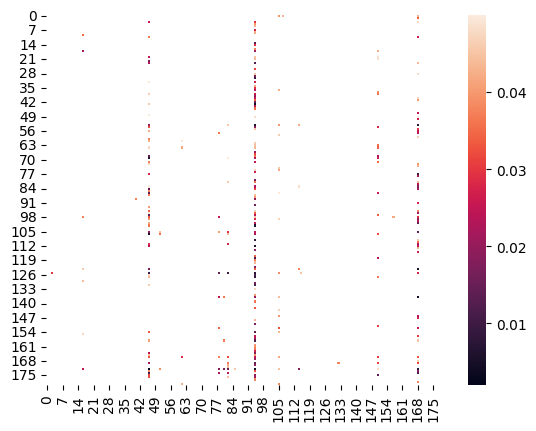

In [23]:
filtered_matrix_ultralow = np.where(p_values_ultralow <= 0.05, p_values_ultralow, np.nan)
sns.heatmap(filtered_matrix_ultralow)

# 04 Load atlas meta data

In [24]:
atlas_info = pd.read_csv('../data/atlas/HCPMMP1_atlas_info.csv', encoding='unicode_escape')

In [25]:
atlas_info = atlas_info.replace(r'\n', ' ', regex=True)

In [26]:
atlas_info

,Parcel\nIndex,Area\nName,Area_Description,Sections,Other_Names
0,1,V1,Primary Visual Cortex,"1,2","17, hOC1, OC, BA17"
1,2,MST,Medial Superior Temporal Area,"5,15","MSTv, hOC5, hOC5v"
2,3,V6,Sixth Visual Area,"2,3,18",112
3,4,V2,Second Visual Area,"1,2","18, hOC2, OB, BA18"
4,5,V3,Third Visual Area,2,"V3d, V3v, VP, hOC3d, hOC3v"
...,...,...,...,...,...
175,176,STSva,Area STSv anterior,"11,14",NaN
176,177,TE1m,Area TE1 Middle,"11,14",NaN
177,178,PI,Para-Insular Area,"11,12,14",IBT
178,179,a32pr,Area anterior 32 prime,19,32'


# 05 Visualization on a glass brain

## 5-1 High frequency

In [27]:
flattened_indices = np.argsort(filtered_matrix_high, axis=None)[:10]

# 0으로 초기화된 마스크 생성
filtered_matrix_high_mask = np.zeros_like(filtered_matrix_high)

# 1D 인덱스를 2D 인덱스로 변환
rows, cols = np.unravel_index(flattened_indices, filtered_matrix_high.shape)

# 마스크에서 선택된 위치를 True로 설정
for row, col in zip(rows, cols):
    if t_stats_high[row, col]==abs(t_stats_high[row, col]):
        # 양수 (HC 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_high_mask[row, col] = 1
    else:
        # 음수 (ADHD 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_high_mask[row, col] = -1

<AxesSubplot: >

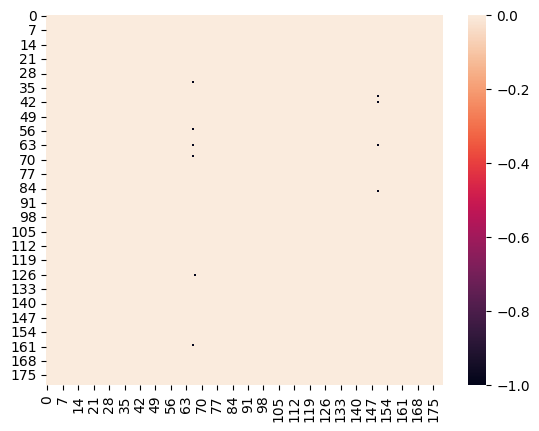

In [28]:
sns.heatmap(filtered_matrix_high_mask)

In [30]:
for i, j in zip(rows, cols):
    row = atlas_info[atlas_info['Parcel\nIndex'] == i][['Area_Description']].values[0][0]
    col = atlas_info[atlas_info['Parcel\nIndex'] == j][['Area_Description']].values[0][0]
    if filtered_matrix_high_mask[i, j] > 0:
        description = 'HC에서 뚜렷하게 나타나는 특징'
    elif filtered_matrix_high_mask[i, j] < 0:
        description = 'ADHD에서 뚜렷하게 나타나는 특징'
    else:
        description = '없음'
    print(row, ',', col, description)

Area 5L , Area PGi ASD에서 뚜렷하게 나타나는 특징
Area 8BM , Area PGi ASD에서 뚜렷하게 나타나는 특징
Area 6mp , Area 47m ASD에서 뚜렷하게 나타나는 특징
ParaHippocampal Area 1 , Area 8Av ASD에서 뚜렷하게 나타나는 특징
Area 8Ad , Area 47m ASD에서 뚜렷하게 나타나는 특징
Area 23d , Area 47m ASD에서 뚜렷하게 나타나는 특징
Lateral Area 7A , Area PGi ASD에서 뚜렷하게 나타나는 특징
Area 8BM , Area 47m ASD에서 뚜렷하게 나타나는 특징
Area anterior  9-46v , Area PGi ASD에서 뚜렷하게 나타나는 특징
VentroMedial Visual Area 2 , Area 47m ASD에서 뚜렷하게 나타나는 특징


In [31]:
scaled_coordinates_30 = scaled_coordinates*30

In [32]:
adjusted_coordinates = scaled_coordinates_30.copy()
adjusted_coordinates[:, 1] -= 10  # X축 좌표 수정
adjusted_coordinates[:, 2] += 2  # Z축 좌표 수정

In [33]:
view = plotting.view_connectome(filtered_matrix_high_mask,adjusted_coordinates, node_size=3.0)
view.save_as_html('ADHD_ROI_180_high_freq_sign.html')

## 02 low

In [34]:
flattened_indices = np.argsort(filtered_matrix_low, axis=None)[:10]

# 0으로 초기화된 마스크 생성
filtered_matrix_low_mask = np.zeros_like(filtered_matrix_low)

# 1D 인덱스를 2D 인덱스로 변환
rows, cols = np.unravel_index(flattened_indices, filtered_matrix_low.shape)

# 마스크에서 선택된 위치를 True로 설정
for row, col in zip(rows, cols):
    if t_stats_low[row, col]==abs(t_stats_low[row, col]):
        # 양수 (HC 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_low_mask[row, col] = 1
    else:
        # 음수 (ADHD 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_low_mask[row, col] = -1

In [35]:
for i, j in zip(rows, cols):
    row = atlas_info[atlas_info['Parcel\nIndex'] == i][['Area_Description']].values[0][0]
    col = atlas_info[atlas_info['Parcel\nIndex'] == j][['Area_Description']].values[0][0]
    if filtered_matrix_low_mask[i, j] > 0:
        description = 'HC에서 뚜렷하게 나타나는 특징'
    elif filtered_matrix_low_mask[i, j] < 0:
        description = 'ADHD에서 뚜렷하게 나타나는 특징'
    else:
        description = '없음'
    print(row, ',', col, description)

Area TE2 posterior , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Area STGa , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Area 8B Lateral , Area IFSa ASD에서 뚜렷하게 나타나는 특징
ParaBelt Complex , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Primary Motor Cortex , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Area 2 , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Area PHT , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Dorsal area 6 , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Medial Belt Complex , Area IFSa ASD에서 뚜렷하게 나타나는 특징
Area PF Complex , Area IFSa ASD에서 뚜렷하게 나타나는 특징


In [36]:
view = plotting.view_connectome(filtered_matrix_low_mask, adjusted_coordinates, node_size=3.0)
view.save_as_html('ADHD_ROI_180_low_freq_sign.html')

## 5-3 ultralow

In [37]:
flattened_indices = np.argsort(filtered_matrix_ultralow, axis=None)[:10]

# 0으로 초기화된 마스크 생성
filtered_matrix_ultralow_mask = np.zeros_like(filtered_matrix_ultralow)

# 1D 인덱스를 2D 인덱스로 변환
rows, cols = np.unravel_index(flattened_indices, filtered_matrix_ultralow.shape)

# 마스크에서 선택된 위치를 True로 설정
for row, col in zip(rows, cols):
    if t_stats_ultralow[row, col]==abs(t_stats_ultralow[row, col]):
        # 양수 (HC 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_ultralow_mask[row, col] = 1
    else:
        # 음수 (ADHD 에서 뚜렷하게 나타나는 특징)
        filtered_matrix_ultralow_mask[row, col] = -1

In [38]:
for i, j in zip(rows, cols):
    row = atlas_info[atlas_info['Parcel\nIndex'] == i][['Area_Description']].values[0][0]
    col = atlas_info[atlas_info['Parcel\nIndex'] == j][['Area_Description']].values[0][0]
    if filtered_matrix_ultralow_mask[i, j] > 0:
        description = 'HC에서 뚜렷하게 나타나는 특징'
    elif filtered_matrix_ultralow_mask[i, j] < 0:
        description = 'ADHD에서 뚜렷하게 나타나는 특징'
    else:
        description = '없음'
    print(row, ',', col, description)

Area TG Ventral , Lateral Area 7P HC에서 뚜렷하게 나타나는 특징
Area PHT , Insular Granular Complex HC에서 뚜렷하게 나타나는 특징
Supplementary and Cingulate Eye Field , Area 47s HC에서 뚜렷하게 나타나는 특징
Area TG Ventral , Area 47s HC에서 뚜렷하게 나타나는 특징
Posterior Insular Area 2 , Lateral Area 7P HC에서 뚜렷하게 나타나는 특징
Area STGa , Insular Granular Complex HC에서 뚜렷하게 나타나는 특징
Area 3a , Area 47s HC에서 뚜렷하게 나타나는 특징
Area 9 Middle , Lateral Area 7P HC에서 뚜렷하게 나타나는 특징
Area OP2-3/VS , Area 47s HC에서 뚜렷하게 나타나는 특징
Anterior Agranular Insula Complex , Area 47s HC에서 뚜렷하게 나타나는 특징


In [39]:
view = plotting.view_connectome(filtered_matrix_ultralow_mask, adjusted_coordinates, node_size=3.0)
view.save_as_html('ADHD_ROI_180_ultralow_freq_sign.html')

# 06 distribution between HC and ADHD
- 일단 기여도 분석으로 조짐

## 6-1 high frequency

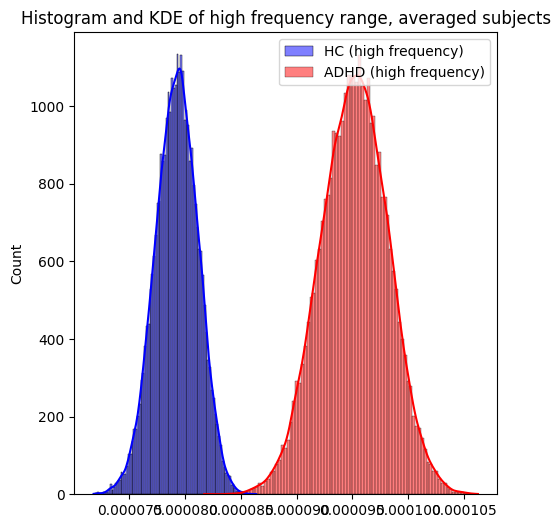

In [18]:
# 데이터를 1차원으로 변환
high_HC_flat = np.mean(high_contribution, axis=0).flatten()
high_ADHD_flat = np.mean(high_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(high_HC_flat, kde=True, color='blue', label='HC (high frequency)')
sns.histplot(high_ADHD_flat, kde=True, color='red', label='ADHD (high frequency)')
plt.legend()
plt.title('Histogram and KDE of high frequency range, averaged subjects')
plt.show()

## 6-2 low frequency

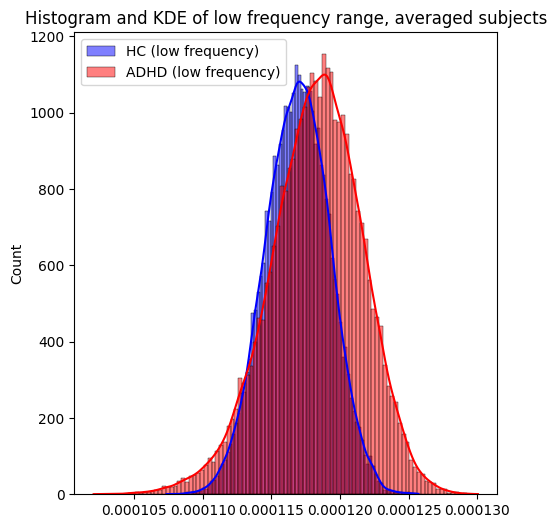

In [19]:
# 데이터를 1차원으로 변환
low_HC_flat = np.mean(low_contribution, axis=0).flatten()
low_ADHD_flat = np.mean(low_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(low_HC_flat, kde=True, color='blue', label='HC (low frequency)')
sns.histplot(low_ADHD_flat, kde=True, color='red', label='ADHD (low frequency)')
plt.legend()
plt.title('Histogram and KDE of low frequency range, averaged subjects')
plt.show()

## 6-3 ultralow frequency

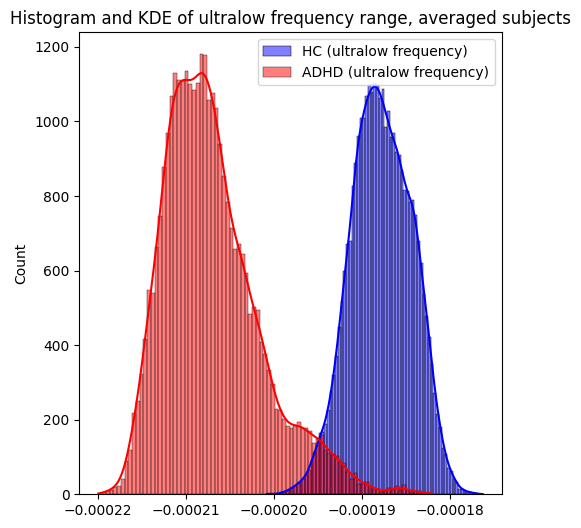

In [20]:
# 데이터를 1차원으로 변환
ultralow_HC_flat = np.mean(ultralow_contribution, axis=0).flatten()
ultralow_ADHD_flat = np.mean(ultralow_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ultralow_HC_flat, kde=True, color='blue', label='HC (ultralow frequency)')
sns.histplot(ultralow_ADHD_flat, kde=True, color='red', label='ADHD (ultralow frequency)')
plt.legend()
plt.title('Histogram and KDE of ultralow frequency range, averaged subjects')
plt.show()

# 07 distribution between HC and ADHD
- 이건 attention matrix

## 7-1 high frequency

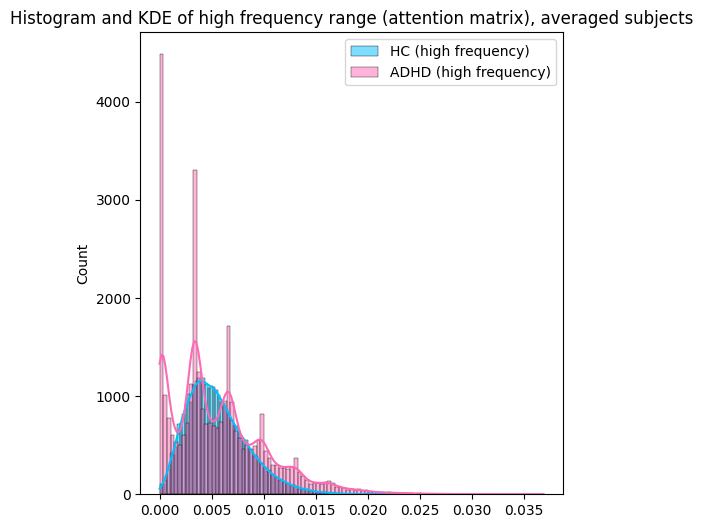

In [27]:
# 데이터를 1차원으로 변환
high_HC_flat = np.mean(high_contribution, axis=0).flatten()
high_ADHD_flat = np.mean(high_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(high_HC_flat, kde=True, color='deepskyblue', label='HC (high frequency)')
sns.histplot(high_ADHD_flat, kde=True, color='hotpink', label='ADHD (high frequency)')
plt.legend()
plt.title('Histogram and KDE of high frequency range (attention matrix), averaged subjects')
plt.show()

## 7-2 low frequency

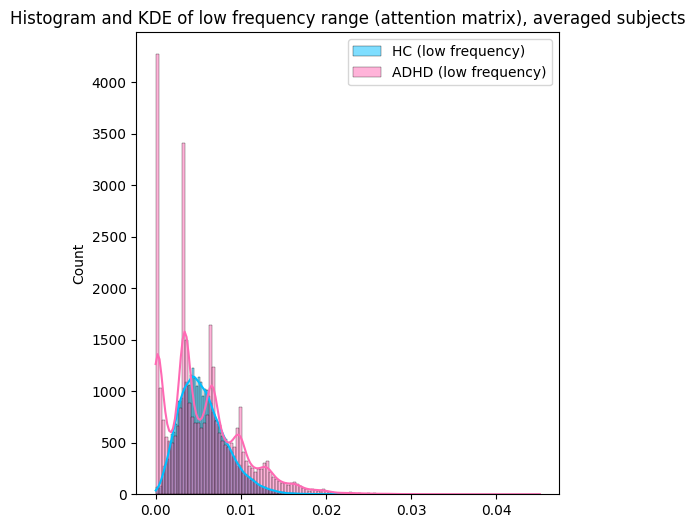

In [28]:
# 데이터를 1차원으로 변환
low_HC_flat = np.mean(low_contribution, axis=0).flatten()
low_ADHD_flat = np.mean(low_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(low_HC_flat, kde=True, color='deepskyblue', label='HC (low frequency)')
sns.histplot(low_ADHD_flat, kde=True, color='hotpink', label='ADHD (low frequency)')
plt.legend()
plt.title('Histogram and KDE of low frequency range (attention matrix), averaged subjects')
plt.show()

## 7-3 ultralow frequency

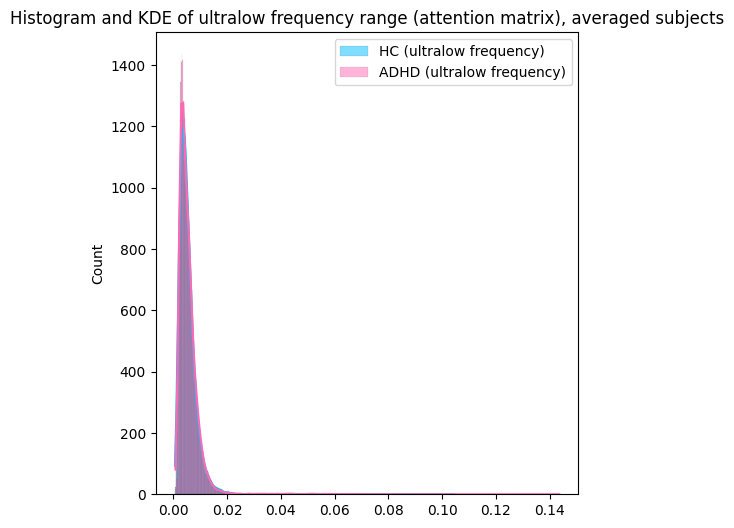

In [29]:
# 데이터를 1차원으로 변환
ultralow_HC_flat = np.mean(ultralow_contribution, axis=0).flatten()
ultralow_ADHD_flat = np.mean(ultralow_contribution_ADHD, axis=0).flatten()

# 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(ultralow_HC_flat, kde=True, color='deepskyblue', label='HC (ultralow frequency)')
sns.histplot(ultralow_ADHD_flat, kde=True, color='hotpink', label='ADHD (ultralow frequency)')
plt.legend()
plt.title('Histogram and KDE of ultralow frequency range (attention matrix), averaged subjects')
plt.show()